In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Storytelling

We have a dataset that contains a range of adult incomes with each persons background information such as their education, occupation, and many more. We're going to explore some relationships between these variables and their overall effect on income. 

## Variables: 

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

In [2]:
adult = pd.read_csv(r'C:\Users\ebent\OneDrive\Documents\GitHub\dsc_v5\Unit 20 - Data Storytelling\adult.csv')
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Although we don't see any missing variables I do see that there are a few "?" in the dataset that are being used in the dataset as a replacement for null values. Lets replace them with NaN values and see how many we truly have. 

In [4]:
adult.replace('?', np.nan, inplace=True)

In [5]:
adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

We're going to drop a few columns to make our data a little cleaner. Dropping the native-country, capital-gain, capital-loss, fnlwgt columns as these don't matter as much. Native country can and does have an effect but deciding and differentiating between each countries economic statuses and their effect on international workers in the U.S. is going to take more time and effort than we need for this project so it will be dropped. Most people don't really have a capital gain/loss as most people don't run their own businesses so it will also be dropped. And fnlwgt is a census related column that doesn't have anything to do with income so it will also be dropped. The educational-num column is just a number to represent the education but it is in the form of a continuous variable so we will keep that. 

In [6]:
adult.drop(columns=['native-country', 'capital-loss', 'capital-gain', 'fnlwgt'], inplace=True)

Right now a lot of our data is cluttered. There's a lot of variables and some of them can get grouped up together. So next we are going to look at each value count for the columns and see if we can group them up together in some form of fashion. 

We also are going to fill some of our NaN values with just a vague variable called 'Other'. This can mean that the variable is missing, they don't have a variable to put, they have a variable to put but forgot. It's just a placeholder that can be a multitude of reasons as to why the variable isn't there. 

In [7]:
adult['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [8]:
adult['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad'], 'HS or below', inplace=True)
adult['education'].replace(['Some-college','Assoc-voc','Assoc-acdm'], 'Minimal College', inplace=True)
adult['education'].replace(['Prof-school', 'Bachelors'], 'Bachelors/Prof', inplace=True)

In [9]:
adult['education'].value_counts()

HS or below        22192
Minimal College    14540
Bachelors/Prof      8859
Masters             2657
Doctorate            594
Name: education, dtype: int64

In [10]:
adult['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
adult['workclass'].replace(['Local-gov','Federal-gov','State-gov'], 'gov', inplace=True)
adult['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'], 'Self-emp', inplace=True)
adult['workclass'].replace(['Without-pay', 'Never-worked'], 'Other', inplace=True)

adult['workclass'].fillna('Other', inplace=True)

In [12]:
adult['workclass'].value_counts()

Private     33906
gov          6549
Self-emp     5557
Other        2830
Name: workclass, dtype: int64

In [13]:
adult['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [14]:
adult['marital-status'].replace(['Married-spouse-absent','Married-AF-spouse'], 'Married-absent', inplace=True)
adult['marital-status'].replace(['Never-married','Widowed'], 'Single', inplace=True)

In [15]:
adult['marital-status'].value_counts()

Married-civ-spouse    22379
Single                17635
Divorced               6633
Separated              1530
Married-absent          665
Name: marital-status, dtype: int64

In [16]:
print(adult['relationship'].unique(), '\n\n')
print(adult['occupation'].unique(), '\n\n')
print(adult['race'].unique(), '\n\n')
print(adult['gender'].unique(), '\n\n')


['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 


['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 


['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 


['Male' 'Female'] 




In [17]:
adult['occupation'].fillna('Other', inplace=True)

We've finished tidying up our data a bit, lets look at our variables and explore their relationship with income. 

Let's first look at age vs income. 

<AxesSubplot:ylabel='income'>

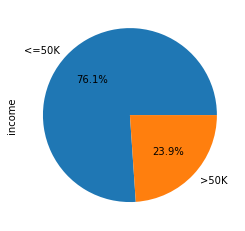

In [18]:
adult['income'].value_counts().plot.pie(autopct='%.1f%%')

In [19]:
print(adult['age'].min())
print(adult['age'].max())

17
90


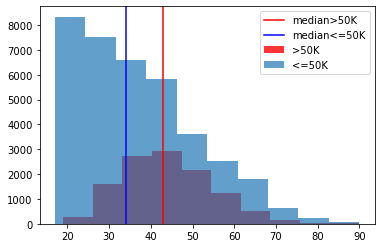

In [20]:
median1 = adult[adult['income']== '>50K']['age'].median()
median2 = adult[adult['income']== '<=50K']['age'].median()

plt.hist(adult[adult['income']== '>50K']['age'], color='red', label='>50K', alpha=0.8)
plt.hist(adult[adult['income']== '<=50K']['age'], label='<=50K', alpha=0.7)
plt.axvline(median1, c='red', linewidth=1.5, label='median>50K')
plt.axvline(median2, c='blue', linewidth=1.5, label='median<=50K')

plt.legend()

plt.show()

Already we see big discrepancies between income within the age ranges. We have an age range between 17-90 and theres a massive difference in the income of people who make over >50K and people who make under or equal to <=50K. The median value of people who make under is about 34-35 whereas the median value for people who make over is about 43-44 which is about a 11-12 year age difference between the two. But what is most noteable is that the quantity of people who make under completely outclasses and overlaps the people who make over. And we could kind of see this in our pie chart. The census contains about 76% of people of make under and 24% of people who make over.

How can we reduce this quantity differential? 

Next let's look at some countplots of our data between variables. We see that there is a massive quantity differential so lets see how this holds up within other variables. 

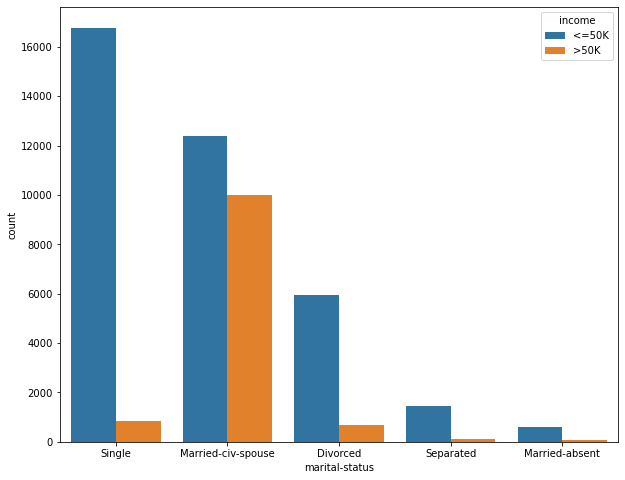

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

_ = sns.countplot(x='marital-status', hue='income', data=adult, ax=ax)

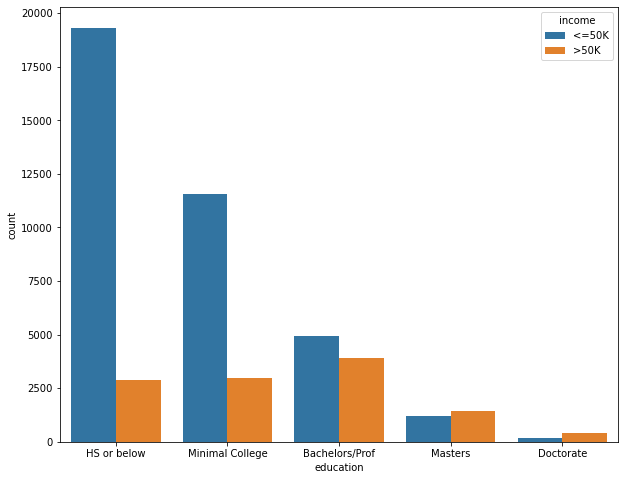

In [30]:
fig, ax = plt.subplots(figsize=(10,8))

_ = sns.countplot(x='education', hue='income', data=adult, ax=ax)

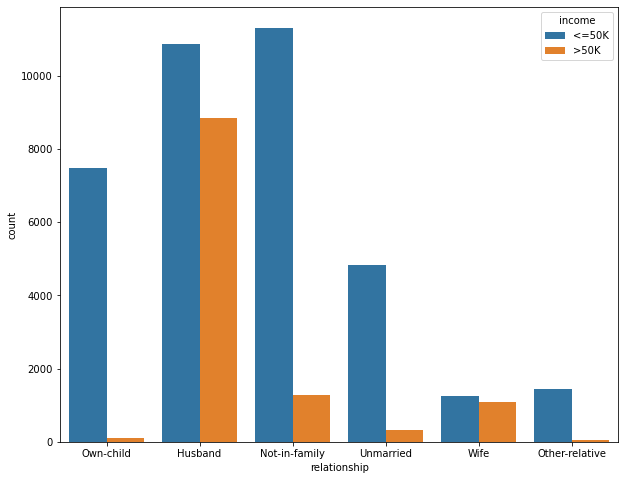

In [39]:
fig, ax = plt.subplots(figsize=(10,8))

_ = sns.countplot(x='relationship', hue='income', data=adult, ax=ax)

So we see a couple common denominators within these graphs. The first couple things we see is in the marital status. There is a large quantity differential again in the under and over 50K category, except for in the Married-civ-spouse portion. The other ones have a common denominator of the person living at home by themselves. Having no support system seems to put you at a disadvantage in making over 50K. Even though some of the other categories such as Married-absent or Separated are still technically married, they don't have a person physically there to support them. Being married with having someone to help support who could be a factor in helping yourself to earn over 50K. We also see this pattern in the relationship countplot. Being a husband or wife increases your chances of making over 50K. Having a child, being unmarried or by yourself in general lowers your chances. 

We also see the quantity differential in educational levels. However the pattern is much more clear, as you move up in education you maximize your chances in earning more. Masters and Doctorate people have a higher amount of people who make over than they do of people who make under. 

Next thing we should look at is workclass and hours per week. Generally the amount of hours you work in a week gives an indication in how much you make, even in the case of salary income. Hourly pay gives you pay the more you work per hour, and salary pay gives you a guaranteed income but it's most likely that you will have to work overtime or more than 40 hours a week on certain weeks depending on the job specifics or certain seasons. For example lawyers might get salary but they work overtime a lot due to cases or workload. So salary gets paid more but they still work more hours in general. 

<AxesSubplot:xlabel='hours-per-week', ylabel='workclass'>

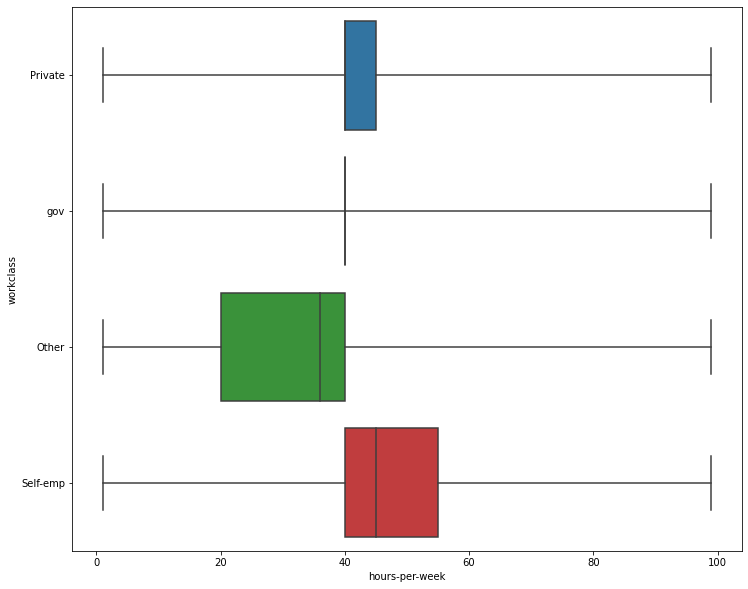

In [36]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x='hours-per-week', y='workclass', data=adult, whis=[0,100])

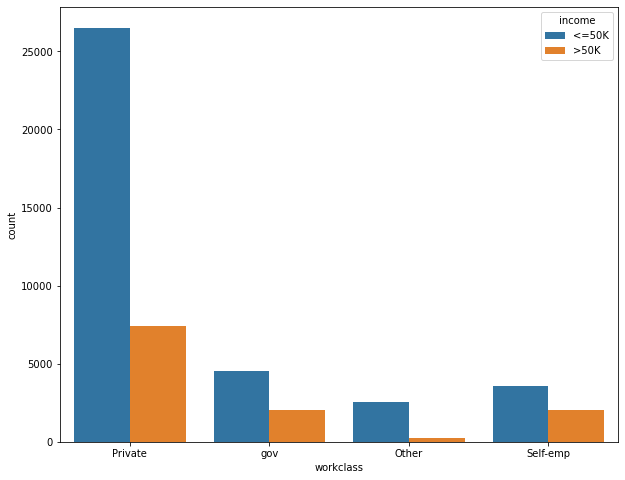

In [37]:
fig, ax = plt.subplots(figsize=(10, 8)) 

_ = sns.countplot(x='workclass', hue='income', data=adult, ax=ax)

We see that there is a range of hours that people work in is mostly in the 40-55 area with other being the only one that drops below 40 which could mean part time work or some other reason. In the countplot the highest amount of people who make over 50K is in the private workclass but it also has the largest quantity differential and we want to lower that and see what is our best chances at make over 50K. Gov and Self-emp have the lowest quantity differential. Being self employed has the best chances of giving you over 50K but you will for sure but it makes some sense as self employed also has the highest hourly work range. Gov has an exact range of 40 hours and it also has a decently small quantity differential in income range, which would mean it gives a pretty comfortable and secure life in government work. 

Let's look at a heatmap correlation of variables really quick. 

<AxesSubplot:>

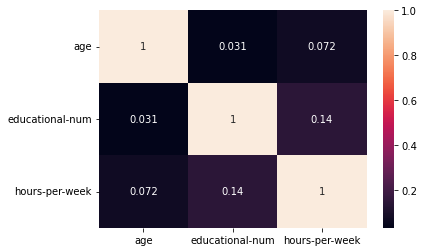

In [38]:
sns.heatmap(adult.corr(), annot=True)

We don't see anything of too much importance so we can ignore correlations for now. 

Let's look at gender and race. 

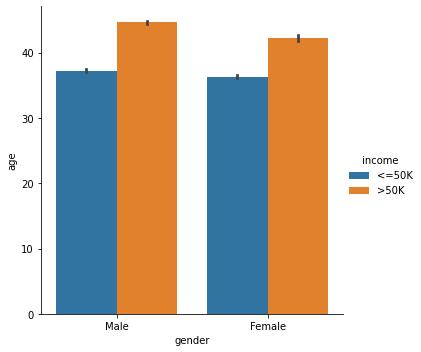

In [42]:
sns.catplot(data=adult, kind='bar', x='gender', y='age', hue='income')

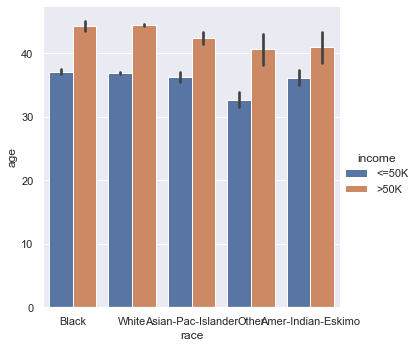

In [49]:
sns.set(rc={'figure.figsize':(30,30)})

sns.catplot(data=adult, kind='bar', x='race', y='age', hue='income')

Again we see the correlation in being older increases your age. Despite certain cultural discrepancies such as race or gender mattering in income, we see that being older increases your income, which makes sense. More experiences equals better pay. 